### Notebook structure

- **Instructions**: set of important informations to understand the structure of the code and how to make it work.
- **Excercise 04.1**: Description of the problem and the parameters' choice.
- **Excercise 04.2**: Molecular Dynamic simulation of Argon in different phases. 

## Instructions

Intruction to C++ compilation and executions .

- To compile the code run in the directory 'es_04.2' the command :  `make`. 
- To automatically execute the code run :  `make run`.
- To clear the files `.o`  please run `make clean`.
- The code generates output files in the  'gas_simulation', 'liquid_simulation', and 'solid_simulation' directories.
- You will also find the directories containing the thermalization phase  'TH_gas_simulation', 'TH_liquid_simulation', and 'TH_solid_simulation' directories.
- These directories contain input files specific to the respective phase.
- Please mind that running the code takes quite some time.

In [1]:
#import essential libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


## Excercise 04.1


In this exercise, we are conducting molecular dynamics simulations of Argon considering a Lennard-Jones potential. The purpose of this simulation is to study different phases of Argon by varying the initial conditions, with the aim of accessing the Law of Corresponding States.

The Law of Corresponding States is a principle in fluid mechanics and thermodynamics that states that the behavior of gases, when expressed in reduced or dimensionless variables, becomes nearly independent of the gas's chemical identity and follows a universal curve. This law provides a way to compare and analyze the thermodynamic properties of different gases under similar conditions.

To apply the law, thermodynamic properties such as pressure ($P$), temperature ($T$), and volume ($V$) are divided by their critical values ($P_c$, $T_c$, $V_c$) for a particular gas. In this case, with a Lennard-Jones potential in the form:

$$
V_\text{LJ}(r)=4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]
$$

the natural units are 
- Length : $r_*=r/\sigma$
- Energy : $U_*=U/\epsilon$ 
- Mass : $m_*=m/m_\text{Ar}$
- Temperature : $T_*=(k_\text{B}T)/\epsilon$
- Pressure : $p_*=(p\sigma^3/\epsilon)$

In the specific case of Argon $\sigma=3.40 \AA$, $\epsilon/k_\text{B} =120 \text{K}$ [[reference](https://doi.org/10.1103/PhysRev.136.A405)], $m_\text{Ar}=39.948 \text{u}$.

Our simulation is conducted considering the system a microcanonical ensemble, where the total energy of the system is conserved, unlike in the canonical ensemble where temperature is fixed. Although the microcanonical ensemble ensures energy conservation, we must take into consideration that the temperature fluctuates during the simulation. This fluctuation is a fundamental characteristic of microcanonical dynamics, and we will address this issue in the next section.

First, we implement the code so that along with the kinetic energy, the potential energy, the total internal energy, and the temperature, it also provides the values of the pressure as a function of the number of blocks simulated.

The pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

The final results will be presented after addressing the problem of thermalization.


## Excercise 04.2

In a microcanonical ensemble, the total energy of the system is fixed, but the system can explore different microstates while conserving this energy. At the start of a simulation, the system is in a perfect crystalline configuration, but that may not be consistent with the desired equilibrium state. These initial conditions lead to deviations in macroscopic properties. The system evolves over time as particles interact with each other, exchanging energy and momentum. As a result, the system's temperature fluctuates.

 Thermalization occurs as the system gradually adjusts from its non-equilibrium initial state to an equilibrium state. During this process, temperature fluctuations decrease, and the system approaches a more stable and consistent temperature. In order to study the macroscopic properties of the system, it needs to be in a state of equilibrium. In practice, it first needs to undergo a thermalization phase. We can simulate the first evolution of the system in the three different states to predict the number of steps it takes to achieve equilibrium. To do so, we study the evolution of temperature as a function of the number of blocks, with each block consisting of one step. The total number of blocks varies for the different states of the simulated system and is plotted on the x-axis.

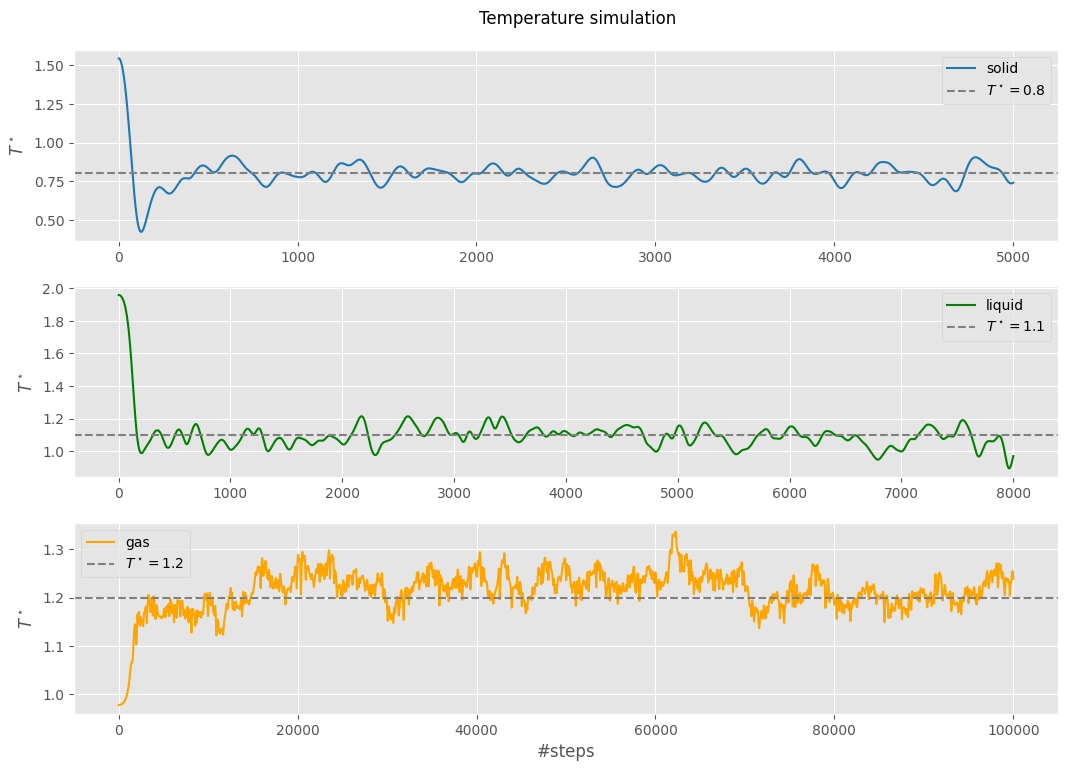

In [132]:
import numpy as np
import matplotlib.pyplot as plt

# Define system names, colors, and target temperatures
systems = ['solid', 'liquid', 'gas']
colors = ['tab:blue', 'green', 'orange']
T_target = [0.8, 1.1, 1.2]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 8))
plt.style.use('ggplot')  # Use ggplot style

# Load and plot temperature data for each system
for i, state in enumerate(systems):
    data = np.loadtxt(f'es_04.2/TH_{state}_simulation/output_temp.dat')
    L=len(data)
    axs[i].plot(data[:, 0], data[:, 1], color=colors[i], label=f'{state}')
    #axs[i].plot(data[:, 0], data[:, 1] + (T_target[i] - np.mean(data[L//2:, 1])), color=colors[i], label=f'{state} + ({round(T_target[i] - np.mean(data[:, 1]), 3)})')
    #the previous line was used for the try and error phase
    axs[i].axhline(y=T_target[i], color="grey", linestyle='--', label=fr'$T^\star = {T_target[i]}$')
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_ylabel(r"$T^\star$")

# Set common titles and labels
fig.suptitle("Temperature simulation")
axs[2].set_xlabel('#steps')


# Adjust subplot spacing
plt.subplots_adjust(left=0.08, bottom=0.1, right=0.9, top=0.93, wspace=0.2, hspace=0.24)

# Display the plot
plt.show()




We want to perform MD simulations  of Argon in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

The previous simulations were performed as a function of the number of blocks simulated, each consisting of 1 step. After some try and error we find the starting values of the temperature needed to obtain the target value after thermalization and the number of steps to reach equilibrium.

We now know that for further simulations, we need to use the following initial temperatures:
- Solid phase: $T^\star = 1.544$
- Liquid phase: $T^\star = 1.972$
- Gas phase: $T^\star = 0.976$

Additionally, it is clear that we need to skip the first steps of the simulation in which the temperature fluctuates the most. The number of steps needed for thermalization varies for the different states. The gaseous form has a longer thermalization time and a far longer fluctuation time scale. By observing the graphics, we can estimate the number of steps the simulation has to skip to start in a thermalized state, rounding up to ensure that thermalization was completed.

- Solid phase: `th_steps=2500`
- Liquid phase: `th_steps=3000`
- Gas phase: `th_steps=20000`

These adjustments ensure that our simulations start in a more stable and thermally equilibrated state.



From the plot we can also observe the typical fluctuation time for the three states. To avoid unwanted correlation we should set the lenght of the blocks greater than the typical lenght of the fluctuations, in particular we set the number of set in each block at

- Solid phase: `nstep=1000`
- Liquid phase: `nsteps=2000`
- Gas phase: `nsteps=10000`

All of the following simulations consist of 100 blocks, consider 108 particles. Every step takes 0.0005 in time reduced units, so $1.07 * 10^{-15}$ seconds. All the computed energies are "per particle", they do not refer to the whole system.

### SOLID SIMULATION


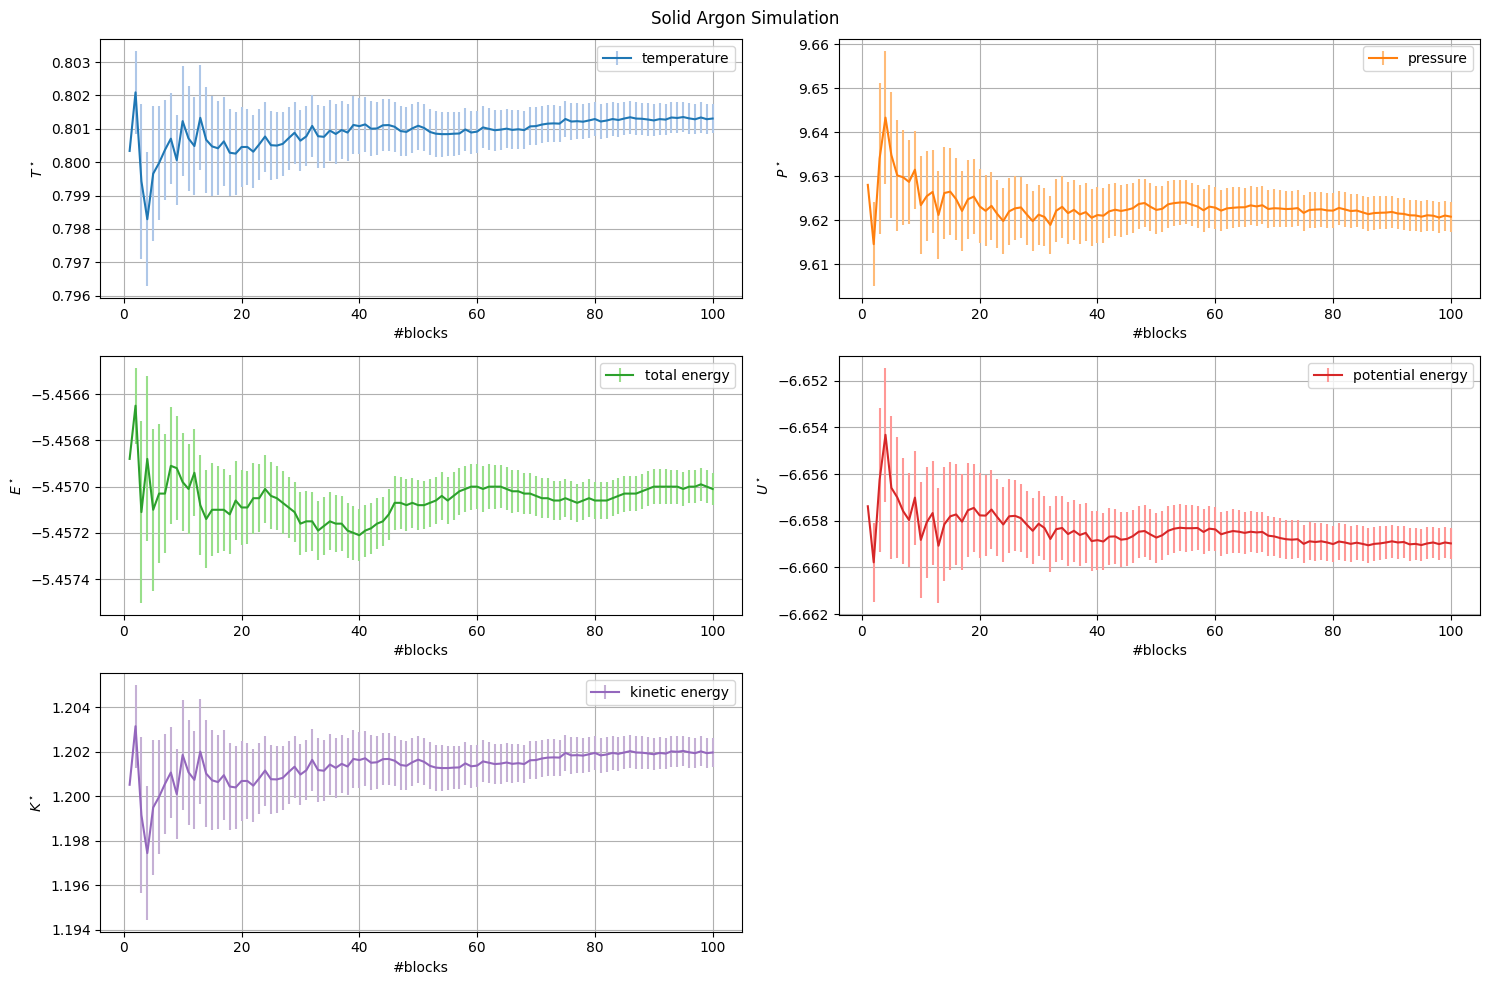

In [4]:

import numpy as np
import matplotlib.pyplot as plt

# Import data formatted as tables from .txt files
data = {
    'total energy': np.loadtxt('es_04.2/solid_simulation/output_etot.dat'),
    'potential energy': np.loadtxt('es_04.2/solid_simulation/output_epot.dat'),
    'kinetic energy': np.loadtxt('es_04.2/solid_simulation/output_ekin.dat'),
    'temperature': np.loadtxt('es_04.2/solid_simulation/output_temp.dat'),
    'pressure': np.loadtxt('es_04.2/solid_simulation/output_pres.dat')
}

L = 2000  # Block size

quantities = ['temperature', 'pressure','total energy', 'potential energy', 'kinetic energy']

ylabels = [r'$T^\star$', r'$P^\star$',r'$E^\star$', r'$U^\star$', r'$K^\star$' ]

colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:purple']
cm = plt.get_cmap('tab20')

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
axs = ax.flatten()

# Plot the data
for i in range(5):
    axs[i].errorbar(data[quantities[i]][:, 0] , data[quantities[i]][:, 2], yerr=data[quantities[i]][:, 3],
                    color=cm(2*i), ecolor=cm(2*i+1), label=quantities[i])
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_xlabel("#blocks",fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Hide the sixth subplot
axs[5].axis('off')

# Set titles and adjust subplot spacing
fig.suptitle("Solid Argon Simulation")
fig.tight_layout()
#plt.subplots_adjust(left=0.08, bottom=0.1, right=0.9, top=0.93, wspace=0.3, hspace=0.24)

# Show the plot
plt.show()


### LIQUID SIMULATION

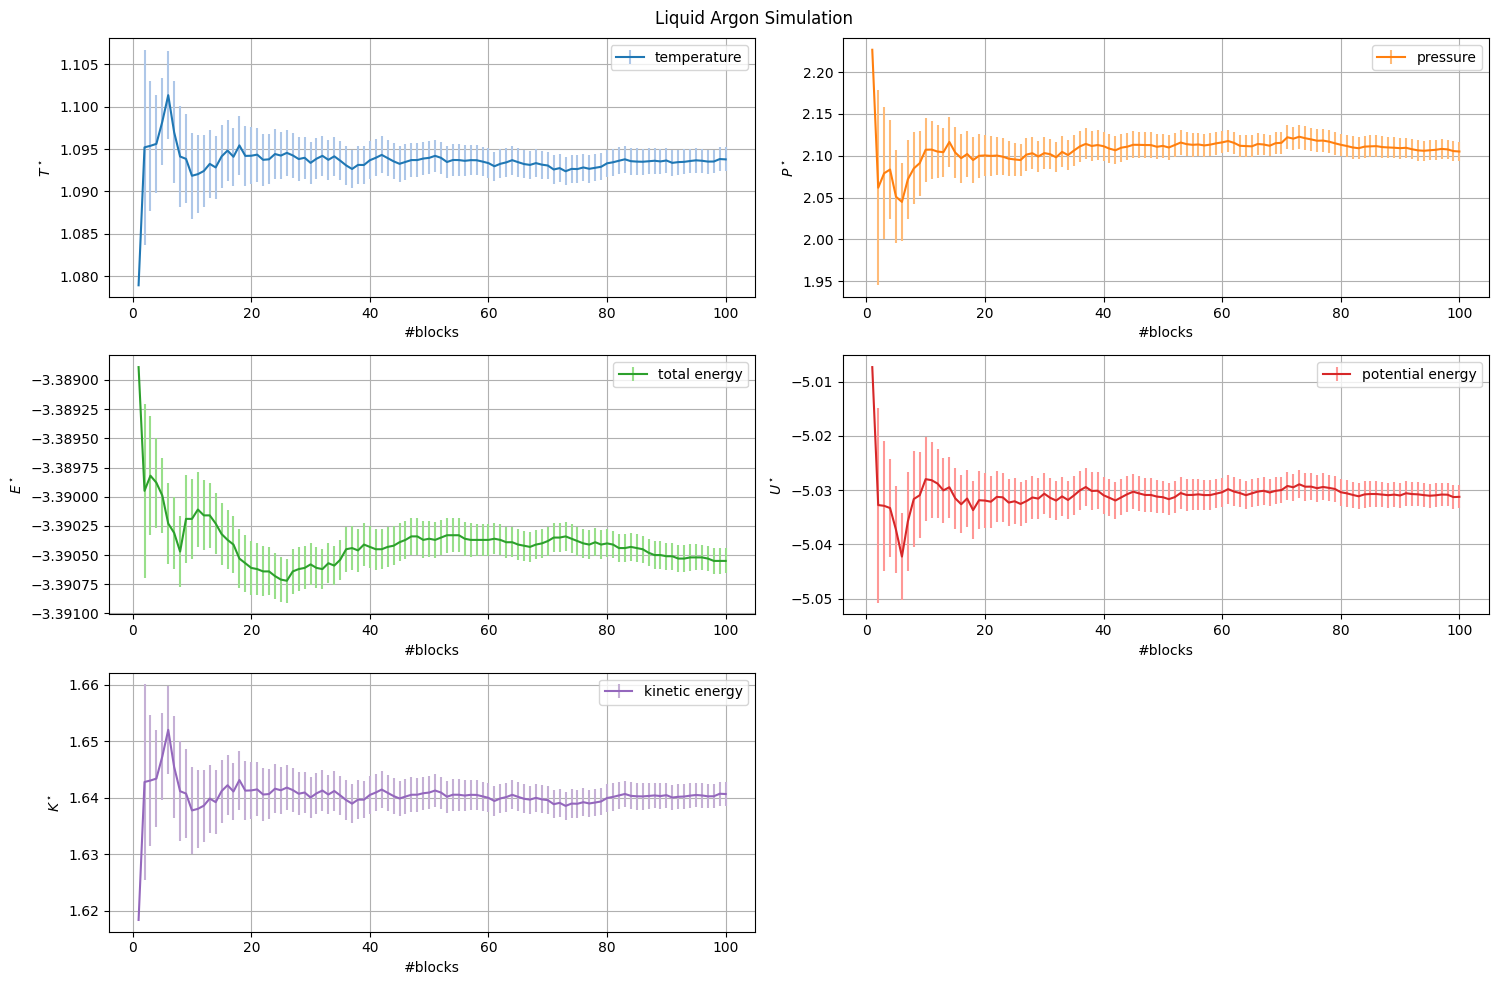

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Import data formatted as tables from .txt files
data = {
    'total energy': np.loadtxt('es_04.2/liquid_simulation/output_etot.dat'),
    'potential energy': np.loadtxt('es_04.2/liquid_simulation/output_epot.dat'),
    'kinetic energy': np.loadtxt('es_04.2/liquid_simulation/output_ekin.dat'),
    'temperature': np.loadtxt('es_04.2/liquid_simulation/output_temp.dat'),
    'pressure': np.loadtxt('es_04.2/liquid_simulation/output_pres.dat')
}

quantities = ['temperature', 'pressure','total energy', 'potential energy', 'kinetic energy']
ylabels = [r'$T^\star$', r'$P^\star$',r'$E^\star$', r'$U^\star$', r'$K^\star$' ]
cm = plt.get_cmap('tab20')

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
axs = ax.flatten()

# Plot the data
for i in range(5):
    axs[i].errorbar(data[quantities[i]][:, 0] , data[quantities[i]][:, 2], yerr=data[quantities[i]][:, 3],
                    color=cm(2*i), ecolor=cm(2*i+1), label=quantities[i])
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_xlabel("#blocks",fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Hide the sixth subplot
axs[5].axis('off')

# Set titles and adjust subplot spacing
fig.suptitle("Liquid Argon Simulation")
fig.tight_layout()
#plt.subplots_adjust(left=0.05, bottom=0.01, right=0.9, top=0.93, wspace=0.3, hspace=0.3)

# Show the plot
plt.show()


### GAS SIMULATION

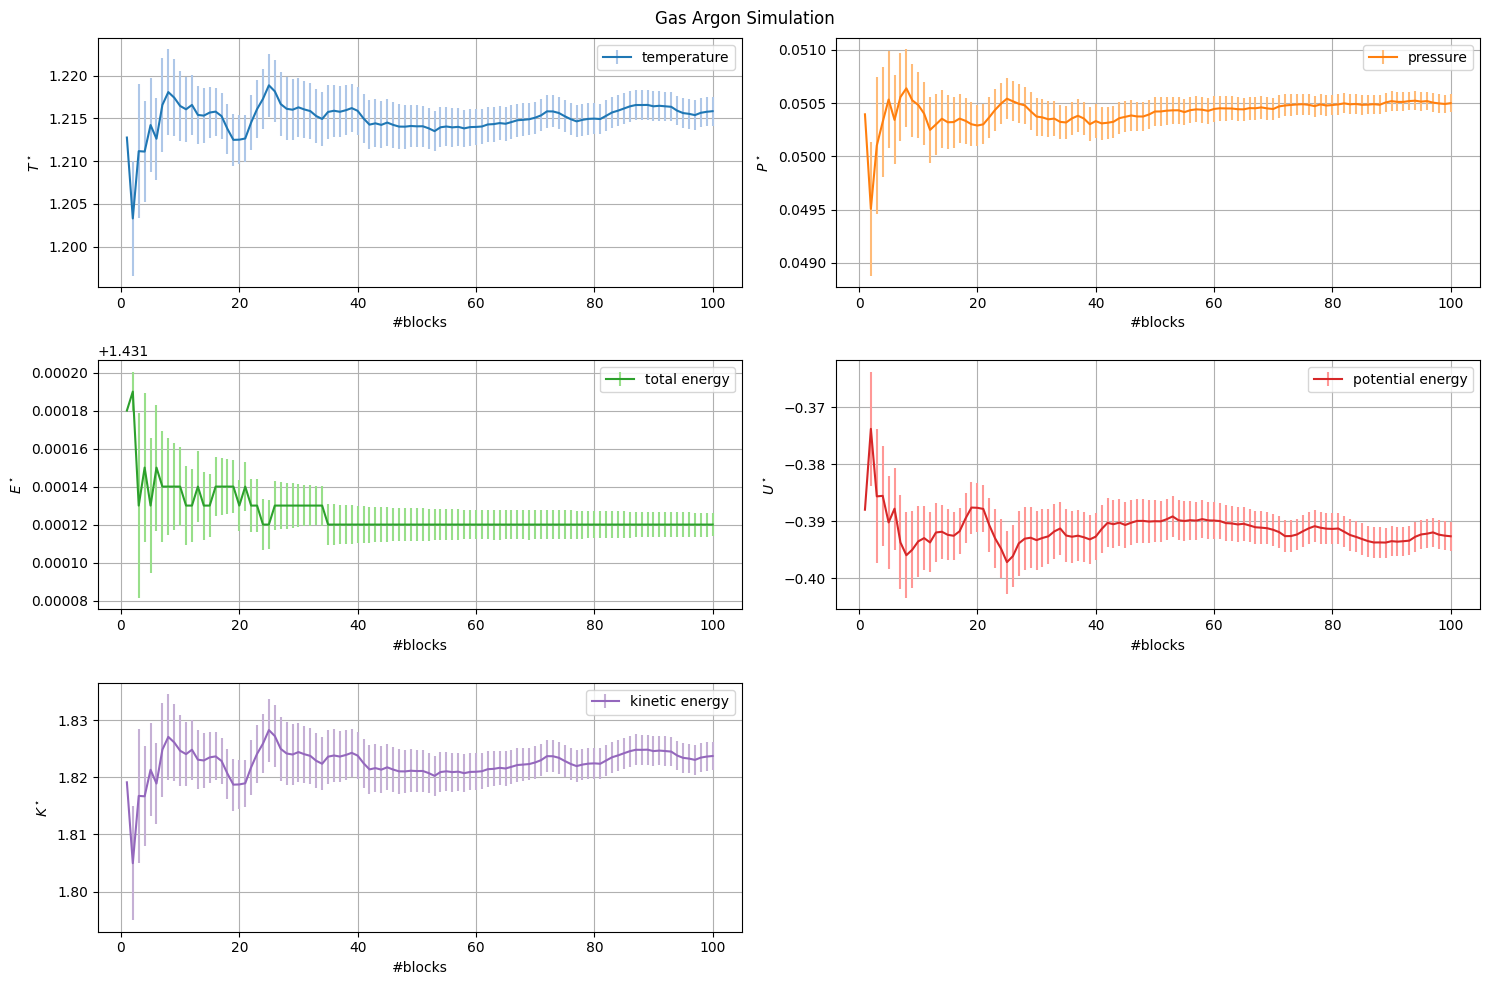

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Import data formatted as tables from .txt files
data = {
    'total energy': np.loadtxt('es_04.2/gas_simulation/output_etot.dat'),
    'potential energy': np.loadtxt('es_04.2/gas_simulation/output_epot.dat'),
    'kinetic energy': np.loadtxt('es_04.2/gas_simulation/output_ekin.dat'),
    'temperature': np.loadtxt('es_04.2/gas_simulation/output_temp.dat'),
    'pressure': np.loadtxt('es_04.2/gas_simulation/output_pres.dat')
}

quantities = ['temperature', 'pressure','total energy', 'potential energy', 'kinetic energy']
ylabels = [r'$T^\star$', r'$P^\star$',r'$E^\star$', r'$U^\star$', r'$K^\star$' ]

cm = plt.get_cmap('tab20')

# Create subplots
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
axs = ax.flatten()

# Plot the data
for i in range(5):
    axs[i].errorbar(data[quantities[i]][:, 0] , data[quantities[i]][:, 2], yerr=data[quantities[i]][:, 3],
                    color=cm(2*i), ecolor=cm(2*i+1), label=quantities[i])
    axs[i].grid(True)
    axs[i].legend()
    axs[i].set_ylabel(ylabels[i])
    axs[i].set_xlabel("#blocks",fontsize=10)
    axs[i].tick_params(axis='both', which='major', labelsize=10)
    axs[i].tick_params(axis='both', which='minor', labelsize=10)

# Hide the sixth subplot
axs[5].axis('off')

# Set titles and adjust subplot spacing
fig.suptitle("Gas Argon Simulation")
fig.tight_layout()
#plt.subplots_adjust(left=0.05, bottom=0.01, right=0.9, top=0.93, wspace=0.3, hspace=0.3)

# Show the plot
plt.show()


Is obviously striking that the total energy in the gas phase is strangely discretized, this is due to underflow problems in c++. We can observe that the kinetic energy is proportional to the temperature, as expected by the equipartition principle. We can also notice that the total energy is conserved as it should be for a microcanonical ensamble.

